EVIDENCIA DE APRENDIZAJE 1: CLASE, OBJETOS Y ARCHIVOS DE DATOS EN PYTHON.

MALENIA JURANY CIFUENTES ALVAREZ CC:1123309582 , MARIA JOSÉ TOVAR PATERNINA CC:1005584586

Analítica de Datos (andres felipe callejas) - PREICA2502B010096

### El script principal, analisis_cafe.ipynb, realiza las siguientes tareas:

1. **Lectura de Datos:** Carga los datos iniciales de producción desde el archivo datos_cosecha.csv.
2.  **Simulación:** Utiliza una función de proyección agrícola para generar 50 nuevos registros. Esta función estima una puntuación de calidad y una proyección de la cosecha futura para cada lote, basándose en la productividad y factores aleatorios.
3.  **Almacenamiento:** Guarda los 50 registros simulados en un nuevo archivo de reporte llamado reporte_produccion_proyectada.csv.
4.  **Visualización:** Crea y guarda un gráfico para analizar los resultados (produccion_proyectada.png) que muestra la producción proyectada por lote.


Módulos de análisis de café importados.
Función de proyección agricola definida.
--- Simulando 50 nuevos lotes para el reporte ---
Simulación completada. 50 nuevos registros generados.
--- Guardando reporte en 'reporte_produccion_proyectada.csv' ---
Reporte guardado.
--- Creando y guardando nuevas visualizaciones ---


Text(0, 0.5, 'Producción Proyectada (Kg)')

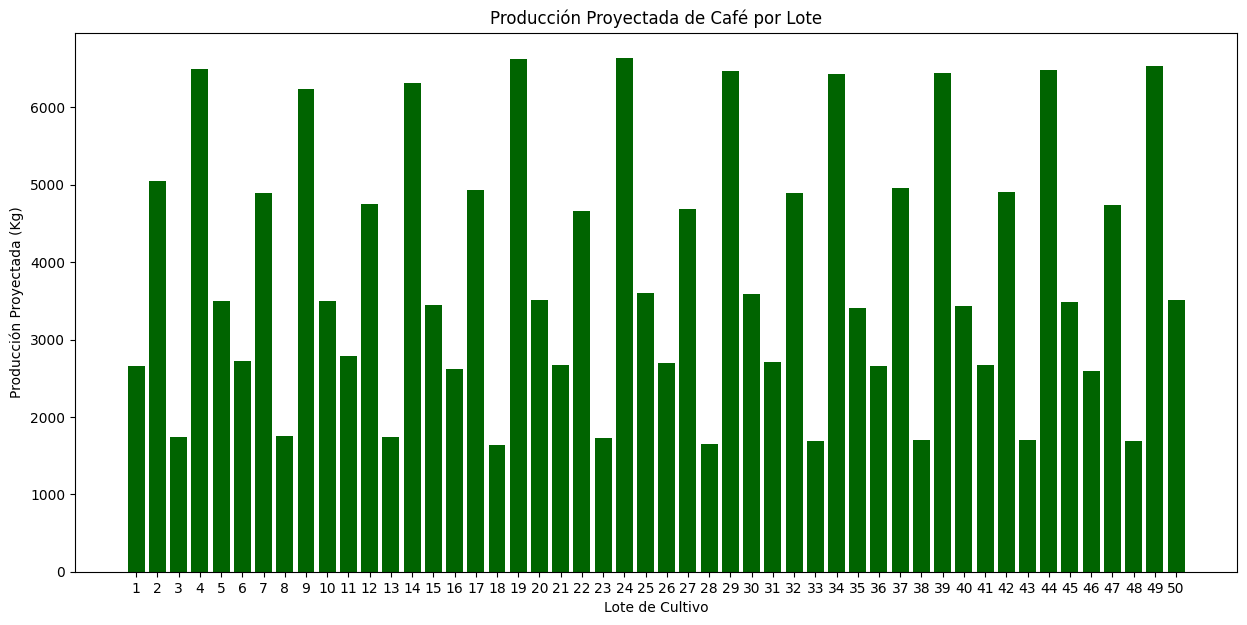

In [ ]:
import csv
import random
import matplotlib.pyplot as plt

print("Módulos de análisis de café importados.")


lotes = []
hectareas = []
producciones_actuales = []

# Abrimos el archivo para leerlo. Si no lo encuentra, el programa parará con un error.
with open('datos_cosecha.csv', mode='r') as archivo_origen:
    lector_csv = csv.DictReader(archivo_origen) 
    for linea in lector_csv:
        lotes.append(int(linea['lote_id']))
        hectareas.append(float(linea['hectareas_cultivadas']))
        producciones_actuales.append(float(linea['produccion_kg']))
        


# Celda 3: Función de Proyección Agrícola
def proyectar_cosecha(kg_producidos, area_hectareas):
    """
    Estima una puntuación de calidad y una proyeccion de cosecha futura.
 
    """
    # Un puntaje base + un bono por productividad (kg por hectárea)
    # y un pequeño factor de suerte, -este es nuestro dato aleatorio- (clima, plagas, etc.)
    productividad = kg_producidos / area_hectareas
    puntaje_calidad = 80 + (productividad / 100) + random.uniform(-2, 2)
    if puntaje_calidad > 95: puntaje_calidad = 95 # Calidad maxima de 95 puntos

    # Logica de Proyección Futura: Se basa en la producción actual y la calidad.
    # Una mejor calidad sugiere mejores prácticas, lo que podría aumentar la cosecha.
    factor_mejora = 1 + (puntaje_calidad - 80) / 100 # Un puntaje de 85 da un 5% de mejora
    proyeccion_kg_futura = kg_producidos * factor_mejora * random.uniform(0.98, 1.05)
    
    return round(puntaje_calidad, 2), int(proyeccion_kg_futura)

print("Función de proyección agricola definida.")


# Celda 4: Simulación para 50 Lotes Futuros
print("--- Simulando 50 nuevos lotes para el reporte ---")
nuevos_lotes_ids = []
calidades_estimadas = []
producciones_proyectadas = []

total_lotes_simulados = 50
total_datos_origen = len(lotes)

for i in range(total_lotes_simulados):
    # Reutilizamos los datos de entrada
    indice_base = i % total_datos_origen
    
    kg_base = producciones_actuales[indice_base]
    hectareas_base = hectareas[indice_base]
    
    # Aplicamos la función de logica
    calidad, proyeccion = proyectar_cosecha(kg_base, hectareas_base)
    
    # Guardamos los resultados
    nuevos_lotes_ids.append(f"{1+i}") # Nuevos IDs de lote
    calidades_estimadas.append(calidad)
    producciones_proyectadas.append(proyeccion)

print("Simulación completada. 50 nuevos registros generados.")

# Celda 5: Guardar el Reporte de Producción en un nuevo CSV
nombre_reporte = 'reporte_produccion_proyectada.csv'
print(f"--- Guardando reporte en '{nombre_reporte}' ---")

with open(nombre_reporte, 'w', newline='') as archivo_destino:
    escritor = csv.writer(archivo_destino)
    escritor.writerow(['ID_Nuevo_Lote', 'Calidad_Estimada_Puntos', 'Produccion_Proyectada_Kg'])
    for i in range(total_lotes_simulados):
        escritor.writerow([
            nuevos_lotes_ids[i],
            calidades_estimadas[i],
            producciones_proyectadas[i]
        ])
print("Reporte guardado.")


# Celda 6: Nuevas Visualizaciones
print("--- Creando y guardando nuevas visualizaciones ---")

# GRÁFICO 1: Barras de la Producción Proyectada
plt.figure(figsize=(15, 7))
plt.bar(nuevos_lotes_ids, producciones_proyectadas, color='darkgreen')
plt.title('Producción Proyectada de Café por Lote')
plt.xlabel('Lote de Cultivo')
plt.ylabel('Producción Proyectada (Kg)')
